<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


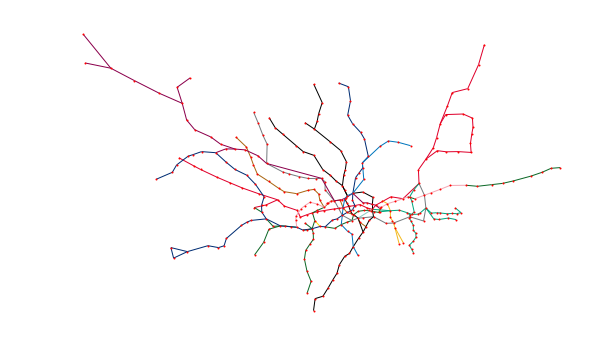

In [49]:
%matplotlib inline
import networkx as nx
from graphlib.classes import Graph
from util import get_subway_graph, draw_subway_graph

G, lines = get_subway_graph('csv', Graph)
draw_subway_graph(G, lines, figsize=(10,6))

In [106]:
import random
import queue as Q

def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    _tree = Graph()
    _nodos = {}
    infinity=99999999999
    _minimos = Q.PriorityQueue()
    _visitados = []
       
    # Si no nos pasan nodo origen elegimos uno al azar
    if origin == None:
        origin = random.choice(list(G.node.keys()))
    
    # Por cada nodo en el grafo pasado
    for nodo in G.node:
        # Si es el de origen le ponemos peso 0 y padre None
        if nodo == origin:
            _nodos[origin] = [0, None]
            _minimos.put([0, nodo])
        
        # Si no ponemos peso infinity y padre None
        else:
            _nodos[nodo] = [infinity, None]
        
        # Y lo añadimos al nuevo grafo
        _tree.add_node(nodo, G.node[nodo])
        
    # Mientras no hayamos visitado todos los nodos-1
    while len(_visitados) < len(G.nodes()):
        # Sacamos de la cola con prioridad al nodo con menos peso
        aux = _minimos.get()
        
        # Si ya lo hemos visitados, vamos sacando nodos hasta encontrar uno que no hayamos visitado
        while aux[1] in _visitados:
            aux = _minimos.get()
        
        _actual = aux[1]
        
        # Por cada vecino del nodo que visitamos
        for vecino in G[_actual]:
            # Si no lo hemos visitado
            if vecino not in _visitados:
                coste = G[_actual][vecino]['distance']
                # Si el coste entre los nodos es menor al coste que ya teniamos para ese nodo,
                # actualizamos coste y padre
                if coste < _nodos[vecino][0]:
                    _nodos[vecino] = [coste, _actual]
                    _minimos.put([coste, vecino])
        
        # Añadimos el nodo visitado a la lista de visitados
        _visitados.append(_actual)
    
    coste = 0
    # Para acabar creamos las aristas en el nuevo grafo
    for nodo in list(_nodos.keys()):
        if nodo != origin:
            _tree.add_edge(nodo, _nodos[nodo][1], G[nodo][_nodos[nodo][1]])
            coste += G[nodo][_nodos[nodo][1]]['distance']
    
    print(coste)
    return _tree

In [107]:
import random
import queue as Q

def prim2(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    _tree = Graph()
    _visitados = []
    coste2 = 0
       
    # Si no nos pasan nodo origen elegimos uno al azar
    if origin == None:
        origin = random.choice(list(G.node.keys()))
        
    _actual = origin
    
    # Por cada nodo en el grafo pasado
    for nodo in G.node:
        _tree.add_node(nodo, G.node[nodo])
        
    # Mientras no hayamos visitado todos los nodos-1
    while len(_visitados) < len(G.nodes()):
        _minimo = [0, None]
        # Por cada vecino del nodo que visitamos
        for vecino in G[_actual]:
            # Si no lo hemos visitado
            if vecino not in _visitados:
                coste = G[_actual][vecino]['distance']
                
                if _minimo[1] == None or coste < _minimo[0]:
                    _minimo = [coste, vecino]
        
        # Añadimos el nodo visitado a la lista de visitados
        if _actual not in _visitados:
            _visitados.append(_actual)
        
        if _minimo[1] != None:
            _tree.add_edge(_actual, _minimo[1], G[_actual][_minimo[1]])
            coste2 += G[_actual][_minimo[1]]['distance']
            _actual = _minimo[1]
        
        else:
            aux = _visitados.index(_actual)
            _actual = _visitados[aux-1]
    
    print(coste2)
    return _tree

4.3042484396914995
4.429974774971418


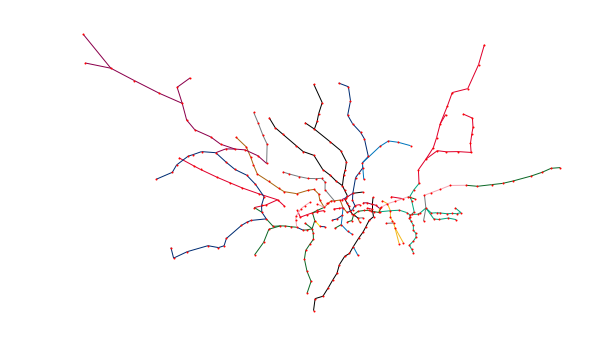

Nodos: 306 306
Aristas: 305 305


In [123]:
t = prim(G,G.nodes()[0])
t2 = prim2(G,G.nodes()[0])
draw_subway_graph(t, lines, figsize=(10,6))
print("Nodos:", len(t.nodes()), len(t2.nodes()))
print("Aristas:", len(t.edges()), len(t2.edges()))

In [95]:
pdf = nx.Graph()
pdf.add_node()
nx.draw(pdf)

TypeError: add_node() missing 1 required positional argument: 'n'

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Para empezar definimos nodo origen si no lo tenemos, luego llenamos el nuevo grafo con los nodos del pasado, y a su vez creamos un diccionario que contiene todos los nodos, y una lista con el peso al padre y el padre, inicializando el padre a None y el peso a infinity, excepto en el nodo origen que será 0.

Vamos recorriendo los nodos del grafo, hasta que los hayamos visitado todos menos 1 (ya que solo tenemos que encontrar |V|-1 aristas), miramos sus vecinos, y de los que no hayamos visitado ya comprobamos si es necesario actualizar su peso y padre. Para decidir cual será el próximo nodo a visitar usamos una cola de prioridad para poder sacar directamente el que menos peso tiene, pero como no podemos actualizar valores tendremos repetidos, así que debemos comprobar que no lo hayamos visitado ya.

Por último para añadir las aristas al nuevo grafo, recorremos el diccionario donde tenemos la información de los nodos, y vamos añadiendo aristas según el padre de cada nodo.

### La complejidad és Theta(|V|) para la inicialización, Theta(|V|-1) = Theta(|V|) para encontrar las aristas con menor peso para conectar todos los nodos y Theta(|V|) para añadir las aristas. Por tanto el coste de total es Theta(|V|+|V|+|V|) = Theta(3|V|) = Theta(|V|).

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>